In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
sns.set_style('darkgrid')

In [3]:
colors = sns.color_palette(n_colors=2)

In [4]:
beers_df = pd.read_csv("./cervezas.csv", sep=";")
beers_df

,Cajas,Distancia,Tiempo
0,10,30,24
1,15,25,27
2,10,40,29
3,20,18,31
4,25,22,25
5,18,31,33
6,12,26,26
7,14,34,28
8,16,29,31
9,22,37,39


In [5]:
beers_df_ordered_cajas = beers_df.sort_values(by="Cajas")
beers_df_ordered_cajas

,Cajas,Distancia,Tiempo
0,10,30,24
2,10,40,29
6,12,26,26
12,13,27,25
7,14,34,28
1,15,25,27
8,16,29,31
11,17,25,30
5,18,31,33
3,20,18,31


In [6]:
beers_df_ordered_distance = beers_df.sort_values(by="Distancia")
beers_df_ordered_distance

,Cajas,Distancia,Tiempo
3,20,18,31
10,24,20,33
4,25,22,25
13,30,23,42
1,15,25,27
11,17,25,30
6,12,26,26
12,13,27,25
8,16,29,31
0,10,30,24


In [7]:
from min_sqrs import min_sqrs
from regression_metrics import mean_square_error, square_error
from utils import add_bias

In [8]:
X = beers_df[["Cajas", "Distancia"]].to_numpy()
X = add_bias(X)
X

array([[10., 30.,  1.],
       [15., 25.,  1.],
       [10., 40.,  1.],
       [20., 18.,  1.],
       [25., 22.,  1.],
       [18., 31.,  1.],
       [12., 26.,  1.],
       [14., 34.,  1.],
       [16., 29.,  1.],
       [22., 37.,  1.],
       [24., 20.,  1.],
       [17., 25.,  1.],
       [13., 27.,  1.],
       [30., 23.,  1.],
       [24., 33.,  1.]])

In [9]:
Y = beers_df[["Tiempo"]].to_numpy()
Y

array([[24],
       [27],
       [29],
       [31],
       [25],
       [33],
       [26],
       [28],
       [31],
       [39],
       [33],
       [30],
       [25],
       [42],
       [40]])

In [10]:
X_cajas = beers_df_ordered_cajas[["Cajas", "Distancia"]].to_numpy()
X_cajas = add_bias(X_cajas)
X_cajas

array([[10., 30.,  1.],
       [10., 40.,  1.],
       [12., 26.,  1.],
       [13., 27.,  1.],
       [14., 34.,  1.],
       [15., 25.,  1.],
       [16., 29.,  1.],
       [17., 25.,  1.],
       [18., 31.,  1.],
       [20., 18.,  1.],
       [22., 37.,  1.],
       [24., 20.,  1.],
       [24., 33.,  1.],
       [25., 22.,  1.],
       [30., 23.,  1.]])

In [11]:
Y_cajas = beers_df_ordered_cajas[["Tiempo"]].to_numpy()
Y_cajas

array([[24],
       [29],
       [26],
       [25],
       [28],
       [27],
       [31],
       [30],
       [33],
       [31],
       [39],
       [33],
       [40],
       [25],
       [42]])

In [12]:
X_distance = beers_df_ordered_distance[["Cajas", "Distancia"]].to_numpy()
X_distance = add_bias(X_distance)
X_distance

array([[20., 18.,  1.],
       [24., 20.,  1.],
       [25., 22.,  1.],
       [30., 23.,  1.],
       [15., 25.,  1.],
       [17., 25.,  1.],
       [12., 26.,  1.],
       [13., 27.,  1.],
       [16., 29.,  1.],
       [10., 30.,  1.],
       [18., 31.,  1.],
       [24., 33.,  1.],
       [14., 34.,  1.],
       [22., 37.,  1.],
       [10., 40.,  1.]])

In [13]:
Y_distance = beers_df_ordered_distance[["Tiempo"]].to_numpy()
Y_distance

array([[31],
       [33],
       [25],
       [42],
       [27],
       [30],
       [26],
       [25],
       [31],
       [24],
       [33],
       [40],
       [28],
       [39],
       [29]])

In [14]:
linear_f = lambda x : x
constant_f = lambda _ : 1

In [15]:
K_fs = [linear_f, linear_f, constant_f]

In [16]:
K = min_sqrs(X, K_fs, Y)
K

array([[0.87720461],
       [0.45592077],
       [2.31120209]])

In [17]:
f = lambda x1, x2 : K[0]*x1 + K[1]*x2 + K[2]

In [18]:
vec_f = np.vectorize(f)

In [19]:
F = vec_f(X[:,0], X[:,1])
F = F.reshape((F.size, 1))
F

array([[24.76087132],
       [26.86729052],
       [29.32007902],
       [28.06186818],
       [34.27157432],
       [32.23442898],
       [24.69159746],
       [30.09337284],
       [29.56817821],
       [38.47877205],
       [32.48252817],
       [28.62169974],
       [26.02472284],
       [39.11351815],
       [38.40949819]])

In [20]:
F_cajas = vec_f(X_cajas[:,0], X_cajas[:,1])
F_cajas = F_cajas.reshape((F_cajas.size, 1))
F_cajas

array([[24.76087132],
       [29.32007902],
       [24.69159746],
       [26.02472284],
       [30.09337284],
       [26.86729052],
       [29.56817821],
       [28.62169974],
       [32.23442898],
       [28.06186818],
       [38.47877205],
       [32.48252817],
       [38.40949819],
       [34.27157432],
       [39.11351815]])

In [21]:
F_distance = vec_f(X_distance[:,0], X_distance[:,1])
F_distance = F_distance.reshape((F_distance.size, 1))
F_distance

array([[28.06186818],
       [32.48252817],
       [34.27157432],
       [39.11351815],
       [26.86729052],
       [28.62169974],
       [24.69159746],
       [26.02472284],
       [29.56817821],
       [24.76087132],
       [32.23442898],
       [38.40949819],
       [30.09337284],
       [38.47877205],
       [29.32007902]])

In [22]:
error = Y - F
error

array([[-0.76087132],
       [ 0.13270948],
       [-0.32007902],
       [ 2.93813182],
       [-9.27157432],
       [ 0.76557102],
       [ 1.30840254],
       [-2.09337284],
       [ 1.43182179],
       [ 0.52122795],
       [ 0.51747183],
       [ 1.37830026],
       [-1.02472284],
       [ 2.88648185],
       [ 1.59050181]])

Text(0.5, 1.0, 'Distribución del error')

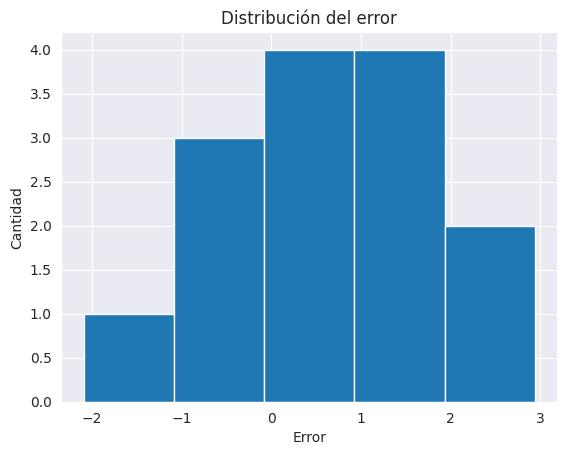

In [23]:
plt.hist(np.delete(error, 4, 0), bins=(1+math.ceil(math.log2(error.size))))
plt.ylabel("Cantidad")
plt.xlabel("Error")
plt.title("Distribución del error")

Text(0.5, 1.0, 'Distribución del error')

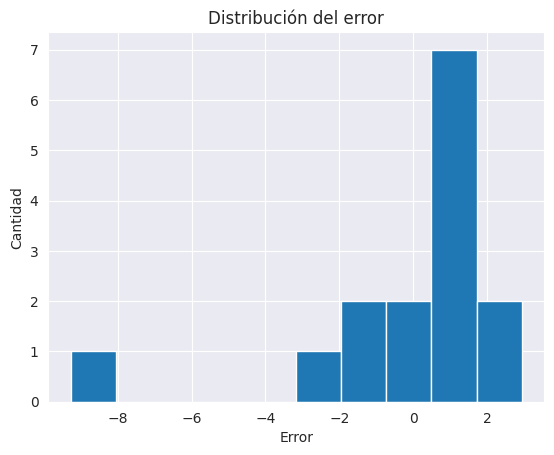

In [24]:
plt.hist(error)
plt.ylabel("Cantidad")
plt.xlabel("Error")
plt.title("Distribución del error")

Text(0.5, 1.0, 'Distribución del error')

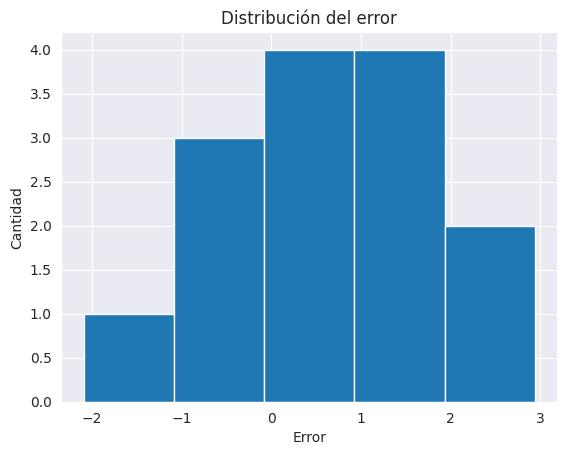

In [25]:
plt.hist(np.delete(error, 4, 0), bins=(1+math.ceil(math.log2(error.size))))
plt.ylabel("Cantidad")
plt.xlabel("Error")
plt.title("Distribución del error")

In [26]:
beers_df['Error Cuadrático'] = abs(error)
beers_df

,Cajas,Distancia,Tiempo,Error Cuadrático
0,10,30,24,0.760871
1,15,25,27,0.132709
2,10,40,29,0.320079
3,20,18,31,2.938132
4,25,22,25,9.271574
5,18,31,33,0.765571
6,12,26,26,1.308403
7,14,34,28,2.093373
8,16,29,31,1.431822
9,22,37,39,0.521228


In [27]:
square_error(Y, F)

118.37473388700424

In [28]:
mean_square_error(Y, F)

7.891648925800283

In [29]:
f(29, 26).item()

39.60407585032653

In [30]:
beers_df_fixed = beers_df.drop(index=4, inplace=False)
beers_df_ordered_cajas_fixed = beers_df_ordered_cajas.drop(index=4, inplace=False)
beers_df_ordered_distance_fixed = beers_df_ordered_distance.drop(index=4, inplace=False)

In [31]:
X_fixed = beers_df_fixed[["Cajas", "Distancia"]].to_numpy()
X_fixed = add_bias(X_fixed)
X_fixed

array([[10., 30.,  1.],
       [15., 25.,  1.],
       [10., 40.,  1.],
       [20., 18.,  1.],
       [18., 31.,  1.],
       [12., 26.,  1.],
       [14., 34.,  1.],
       [16., 29.,  1.],
       [22., 37.,  1.],
       [24., 20.,  1.],
       [17., 25.,  1.],
       [13., 27.,  1.],
       [30., 23.,  1.],
       [24., 33.,  1.]])

In [32]:
Y_fixed = beers_df_fixed[["Tiempo"]].to_numpy()
Y_fixed

array([[24],
       [27],
       [29],
       [31],
       [33],
       [26],
       [28],
       [31],
       [39],
       [33],
       [30],
       [25],
       [42],
       [40]])

In [33]:
X_cajas_fixed = beers_df_ordered_cajas_fixed[["Cajas", "Distancia"]].to_numpy()
X_cajas_fixed = add_bias(X_cajas_fixed)
X_cajas_fixed

array([[10., 30.,  1.],
       [10., 40.,  1.],
       [12., 26.,  1.],
       [13., 27.,  1.],
       [14., 34.,  1.],
       [15., 25.,  1.],
       [16., 29.,  1.],
       [17., 25.,  1.],
       [18., 31.,  1.],
       [20., 18.,  1.],
       [22., 37.,  1.],
       [24., 20.,  1.],
       [24., 33.,  1.],
       [30., 23.,  1.]])

In [34]:
Y_cajas_fixed = beers_df_ordered_cajas_fixed[["Tiempo"]].to_numpy()
Y_cajas_fixed

array([[24],
       [29],
       [26],
       [25],
       [28],
       [27],
       [31],
       [30],
       [33],
       [31],
       [39],
       [33],
       [40],
       [42]])

In [35]:
X_distance_fixed = beers_df_ordered_distance_fixed[["Cajas", "Distancia"]].to_numpy()
X_distance_fixed = add_bias(X_distance_fixed)
X_distance_fixed

array([[20., 18.,  1.],
       [24., 20.,  1.],
       [30., 23.,  1.],
       [15., 25.,  1.],
       [17., 25.,  1.],
       [12., 26.,  1.],
       [13., 27.,  1.],
       [16., 29.,  1.],
       [10., 30.,  1.],
       [18., 31.,  1.],
       [24., 33.,  1.],
       [14., 34.,  1.],
       [22., 37.,  1.],
       [10., 40.,  1.]])

In [36]:
Y_distance_fixed = beers_df_ordered_distance_fixed[["Tiempo"]].to_numpy()
Y_distance_fixed

array([[31],
       [33],
       [42],
       [27],
       [30],
       [26],
       [25],
       [31],
       [24],
       [33],
       [40],
       [28],
       [39],
       [29]])

In [37]:
K_fixed = min_sqrs(X_fixed, K_fs, Y_fixed)
K_fixed

array([[1.00313562],
       [0.38045078],
       [2.91516877]])

In [38]:
f_fixed = lambda x1, x2 : K_fixed[0]*x1 + K_fixed[1]*x2 + K_fixed[2]

In [39]:
vec_f_fixed = np.vectorize(f_fixed)

In [40]:
F_fixed = vec_f_fixed(X_fixed[:,0], X_fixed[:,1])
F_fixed = F_fixed.reshape((F_fixed.size, 1))
F_fixed

array([[24.36004838],
       [27.47347256],
       [28.1645562 ],
       [29.82599518],
       [32.7655841 ],
       [24.84451649],
       [29.89439398],
       [29.99841131],
       [39.06083126],
       [34.59943921],
       [29.4797438 ],
       [26.22810289],
       [41.75960526],
       [39.54529937]])

In [41]:
F_cajas_fixed = vec_f_fixed(X_cajas_fixed[:,0], X_cajas_fixed[:,1])
F_cajas_fixed = F_cajas_fixed.reshape((F_cajas_fixed.size, 1))
F_cajas_fixed

array([[24.36004838],
       [28.1645562 ],
       [24.84451649],
       [26.22810289],
       [29.89439398],
       [27.47347256],
       [29.99841131],
       [29.4797438 ],
       [32.7655841 ],
       [29.82599518],
       [39.06083126],
       [34.59943921],
       [39.54529937],
       [41.75960526]])

In [42]:
F_distance_fixed = vec_f_fixed(X_distance_fixed[:,0], X_distance_fixed[:,1])
F_distance_fixed = F_distance_fixed.reshape((F_distance_fixed.size, 1))
F_distance_fixed

array([[29.82599518],
       [34.59943921],
       [41.75960526],
       [27.47347256],
       [29.4797438 ],
       [24.84451649],
       [26.22810289],
       [29.99841131],
       [24.36004838],
       [32.7655841 ],
       [39.54529937],
       [29.89439398],
       [39.06083126],
       [28.1645562 ]])

In [43]:
error_fixed = Y_fixed - F_fixed
error_fixed

array([[-0.36004838],
       [-0.47347256],
       [ 0.8354438 ],
       [ 1.17400482],
       [ 0.2344159 ],
       [ 1.15548351],
       [-1.89439398],
       [ 1.00158869],
       [-0.06083126],
       [-1.59943921],
       [ 0.5202562 ],
       [-1.22810289],
       [ 0.24039474],
       [ 0.45470063]])

In [44]:
beers_df_fixed['Error Cuadrático'] = abs(error_fixed)
beers_df_fixed

,Cajas,Distancia,Tiempo,Error Cuadrático
0,10,30,24,0.360048
1,15,25,27,0.473473
2,10,40,29,0.835444
3,20,18,31,1.174005
5,18,31,33,0.234416
6,12,26,26,1.155484
7,14,34,28,1.894394
8,16,29,31,1.001589
9,22,37,39,0.060831
10,24,20,33,1.599439


Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

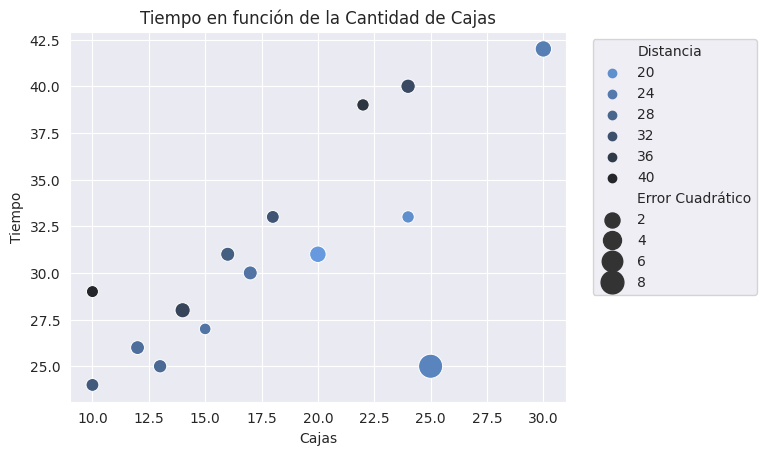

In [45]:
sns.scatterplot(beers_df, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

In [46]:
K_fs_caja_tiempo = [linear_f, constant_f]

In [47]:
K_caja_tiempo = min_sqrs(add_bias(X[:, 0:1]), K_fs_caja_tiempo, Y)
K_caja_tiempo

array([[ 0.68452381],
       [18.5452381 ]])

In [48]:
f_caja_tiempo = lambda x : K_caja_tiempo[0]*x + K_caja_tiempo[1]
vec_f_caja_tiempo = np.vectorize(f_caja_tiempo)

F_caja_tiempo = vec_f_caja_tiempo(X[:, 0:1])
F_caja_tiempo

array([[25.39047619],
       [28.81309524],
       [25.39047619],
       [32.23571429],
       [35.65833333],
       [30.86666667],
       [26.75952381],
       [28.12857143],
       [29.49761905],
       [33.6047619 ],
       [34.97380952],
       [30.18214286],
       [27.44404762],
       [39.08095238],
       [34.97380952]])

In [49]:
plot_X = np.arange(X[:, 0:1].min(), X[:, 0:1].max(), 0.1)
plot_Y = vec_f_caja_tiempo(plot_X)

Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

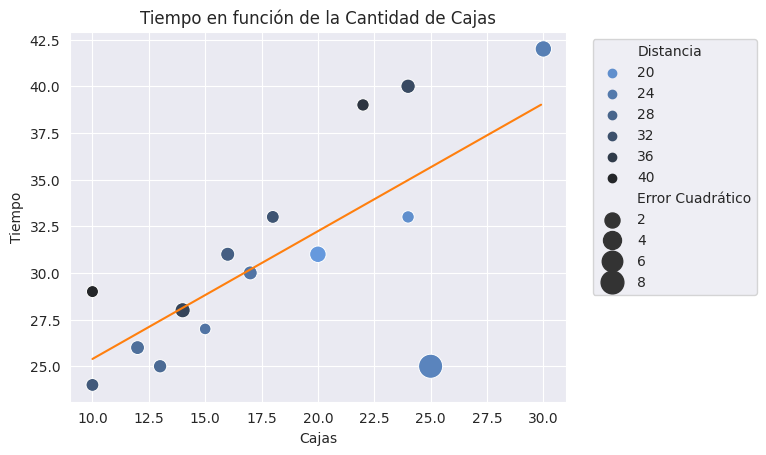

In [50]:
sns.scatterplot(beers_df, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.plot(plot_X, plot_Y, color=colors[1])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

In [51]:
X_aux = np.delete(X, 4, axis=0)
Y_aux = np.delete(Y, 4, axis=0)

In [52]:
K_aux = min_sqrs(add_bias(X_aux[:, 0:1]), K_fs_caja_tiempo, Y_aux)
K_aux

array([[ 0.86157254],
       [16.20819491]])

In [53]:
f_aux = lambda x : K_aux[0]*x + K_aux[1]
vec_f_aux = np.vectorize(f_aux)

F_aux = vec_f_aux(X_aux[:, 0:1])
F_aux

array([[24.82392027],
       [29.13178295],
       [24.82392027],
       [33.43964563],
       [31.71650055],
       [26.54706534],
       [28.27021041],
       [29.99335548],
       [35.1627907 ],
       [36.88593577],
       [30.85492802],
       [27.40863787],
       [42.05537099],
       [36.88593577]])

In [54]:
plot_X_aux = np.arange(X_aux[:, 0:1].min(), X_aux[:, 0:1].max(), 0.1)
plot_Y_aux = vec_f_aux(plot_X_aux)

Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

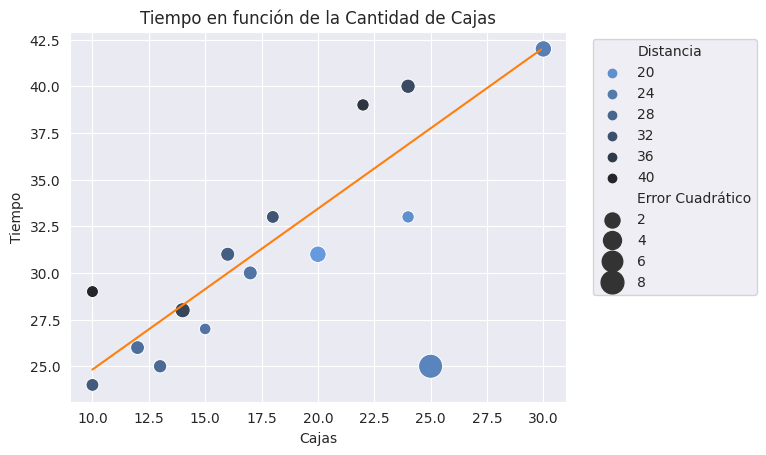

In [55]:
sns.scatterplot(beers_df, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.plot(plot_X_aux, plot_Y_aux, color=colors[1])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

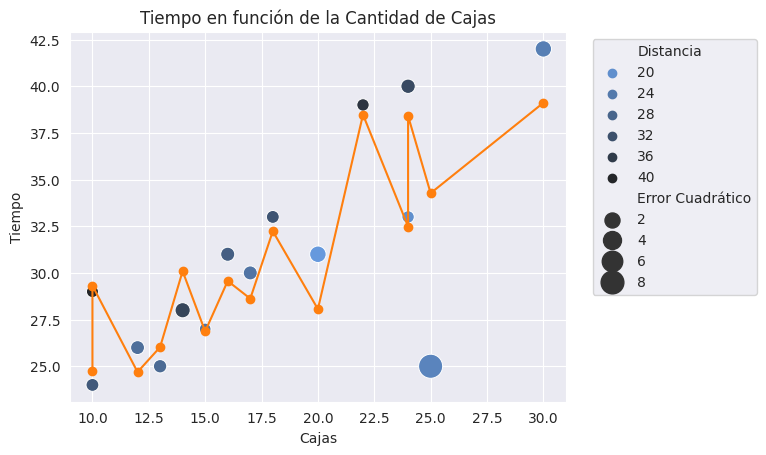

In [56]:
sns.scatterplot(beers_df, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.plot(X_cajas[:, 0:1], F_cajas, color=colors[1], marker="o")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

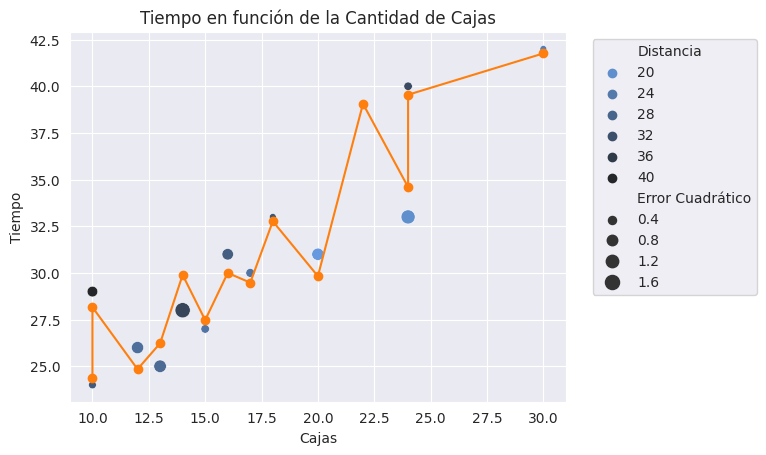

In [57]:
sns.scatterplot(beers_df_fixed, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70*(error_fixed.min()/error.min()),300*(error_fixed.max()/error.max())))
plt.plot(X_cajas_fixed[:, 0:1], F_cajas_fixed, color=colors[1], marker="o")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

Text(0.5, 1.0, 'Tiempo en función de la Distancia')

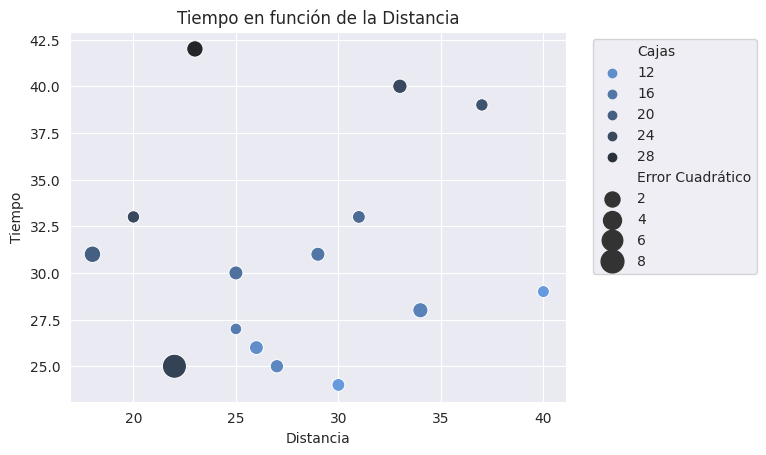

In [58]:
sns.scatterplot(beers_df, x="Distancia", y="Tiempo", hue="Cajas", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Distancia")

Text(0.5, 1.0, 'Tiempo en función de la Distancia')

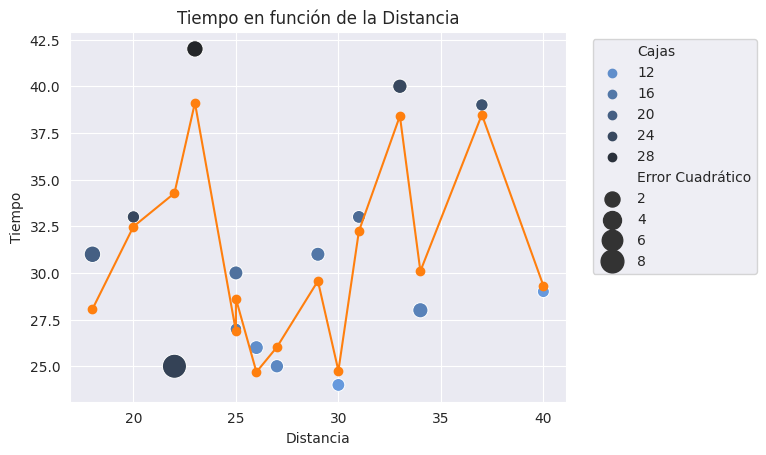

In [59]:
sns.scatterplot(beers_df, x="Distancia", y="Tiempo", hue="Cajas", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.plot(X_distance[:, 1:2], F_distance, color=colors[1], marker="o")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Distancia")

Text(0.5, 1.0, 'Tiempo en función de la Distancia')

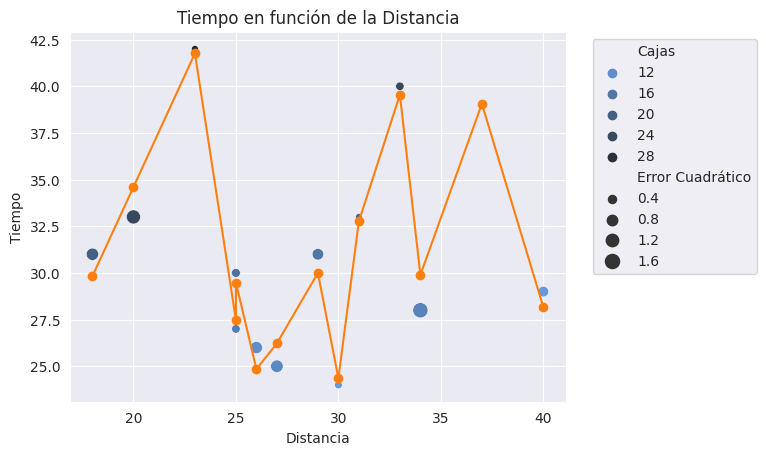

In [60]:
sns.scatterplot(beers_df_fixed, x="Distancia", y="Tiempo", hue="Cajas", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70*(error_fixed.min()/error.min()),300*(error_fixed.max()/error.max())))
plt.plot(X_distance_fixed[:, 1:2], F_distance_fixed, color=colors[1], marker="o")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Distancia")

Text(0.5, 1.0, 'Cantidad de Cajas en función de la Distancia')

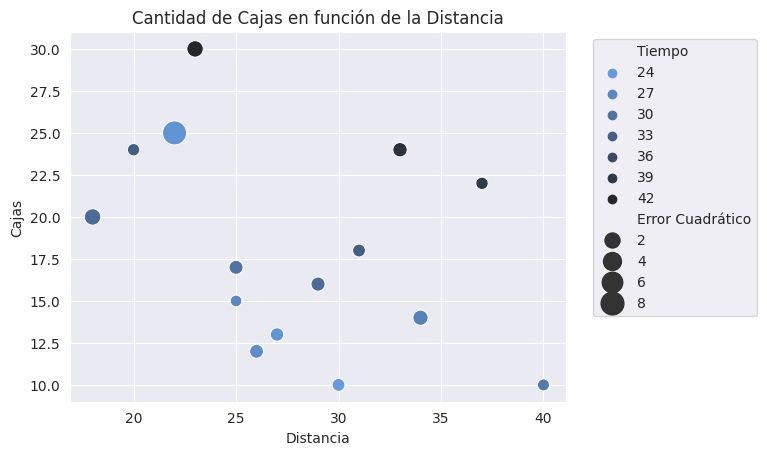

In [61]:
sns.scatterplot(beers_df, x="Distancia", y="Cajas", hue="Tiempo", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Cantidad de Cajas en función de la Distancia")

Text(0.5, 1.0, 'Cantidad de Cajas en función de la Distancia')

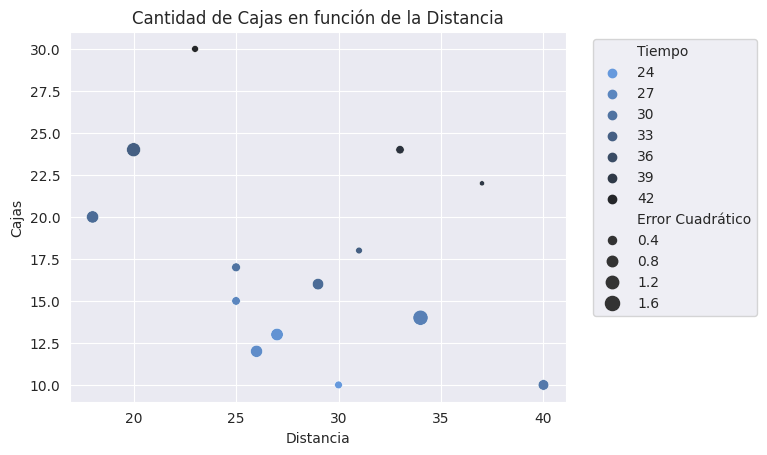

In [62]:
sns.scatterplot(beers_df_fixed, x="Distancia", y="Cajas", hue="Tiempo", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70*(error_fixed.min()/error.min()),300*(error_fixed.max()/error.max())))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Cantidad de Cajas en función de la Distancia")